# Дипломная работа по курсу "Python для анализа данных"

Задание 1

In [80]:
import pandas as pd
import scipy as spy 
from scipy import stats
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [81]:
data = pd.read_csv('HR.csv') # загрузка файла в датасет
data.info() # основная информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [82]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Признаки:

1. satisfaction_level - Уровень удовлетворенности работой

2. Last_evaluation - Время с момента последней оценки в годах

3. number_project - Количество проектов, выполненных за время работы

4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц

5. time_spend_company - Стаж работы в компании в годах

6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником

7. left - уволился ли сотрудник

8. promotion_last_5years - повышался ли сотрудник за последние пять лет

9. department - отдел в котором работает сотрудник

10. salary - относительный уровень зарплаты

Задание 2

In [83]:
dictionary = {} # словарь с последующими метриками
dictionary['metrics'] = ['Среднее', 'Медиана', 'Мода', 'Минимальное', 'Максимальное', 'Сред. отклонение'] # первый столбец с наименованием метрик

In [84]:
for x in data.columns.values[0:7]: # метрики для каждого столбца, имеющего количественные переменные
    dictionary[x] = [data[x].mean(), data[x].median(), data[x].mode()[0], data[x].min(), data[x].max(), data[x].std()]

metrics = pd.DataFrame(dictionary) # словарь => датасет pd
metrics

,metrics,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left
0,Среднее,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083
1,Медиана,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
2,Мода,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000
3,Минимальное,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
4,Максимальное,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000
5,Сред. отклонение,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924


Задание 3

In [85]:
data.corr() # корреляционная матрица (Пирсон)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [86]:
data.corr(method='spearman') # корреляционная матрица (Спирман)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,-0.365842,0.022306
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.002440,-0.007167
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.019544,-0.002960
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,0.046455,-0.002951
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.268876,0.035205
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,-0.154622,0.039245
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,1.000000,-0.061788
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,-0.061788,1.000000


In [87]:
from pylab import rcParams
import seaborn as sns 

In [88]:
rcParams['figure.figsize'] = [8.0, 8.0]

<AxesSubplot:>

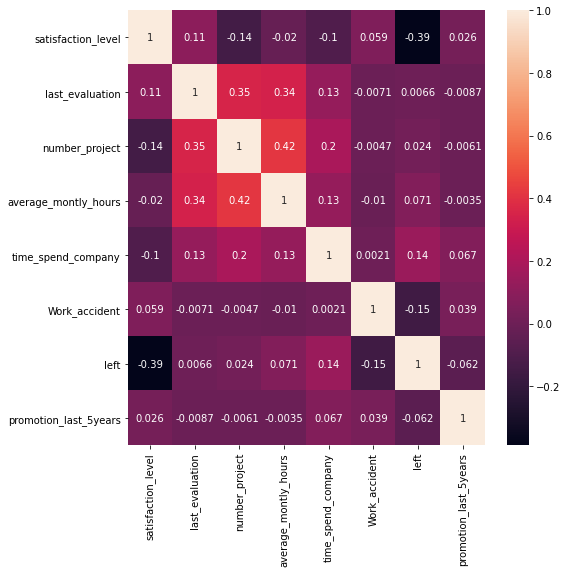

In [89]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 10}) # тепловая карта по Пирсону

<AxesSubplot:>

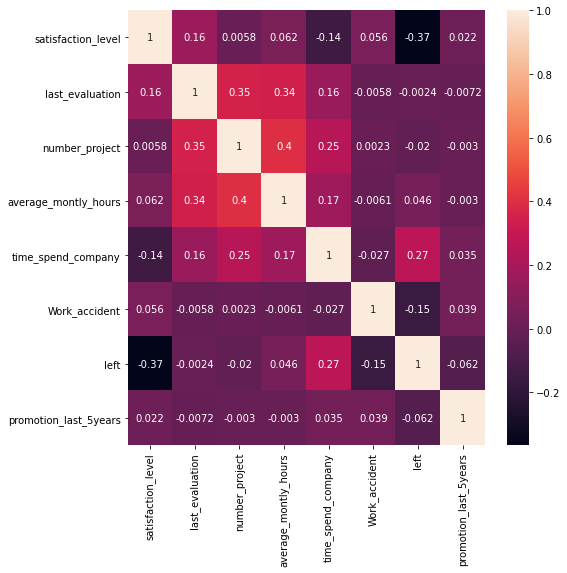

In [90]:
sns.heatmap(data.corr(method='spearman'), annot=True, annot_kws={"size": 10}) # тепловая карта пр Спирману

Можно сделать вывод, что самые скоррелированные переменные: number_project и average_montly_hours

Наименее скоррелированные переменные: time_spend_company и work_accident (Пирсон), work_accident и number_project (Спирман)

Задание 4

In [91]:
department = data.groupby('department').count()[['salary']].reset_index().rename({'salary': 'employees'}, axis=1)

department

,department,employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


Задание 5

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
salary = data.groupby('salary').count()[['department']].reset_index().rename({'department': 'employees'}, axis=1)

salary

,salary,employees
0,high,1237
1,low,7316
2,medium,6446


In [94]:
salary['number'] = np.where(salary['salary'] == 'low', 1, np.where(salary['salary'] == 'medium', 2, 3))
salary = salary.sort_values(['number'], ascending=False).reset_index().drop(['index', 'number'], axis=1)
salary

,salary,employees
0,high,1237
1,medium,6446
2,low,7316


In [95]:
rcParams['figure.figsize'] = [5.0, 5.0] # размер визуализации

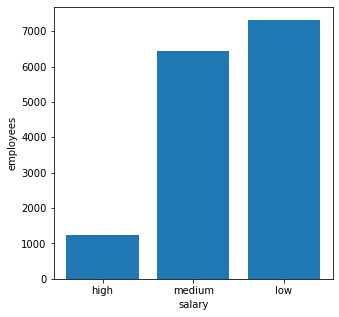

In [96]:
plt.bar(salary['salary'], salary['employees']) 

plt.xticks(salary['salary']) # подписи категорий для оси X

plt.xlabel("salary")
plt.ylabel("employees")

plt.show()

Задание 6

In [97]:
# рассчет количества значений
salary_dep = data.groupby(['department', 'salary']).count()[['satisfaction_level']].reset_index().rename({'satisfaction_level': 'employees'}, axis=1)
salary_dep.head()

,department,salary,employees
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


In [98]:
salary_dep['number'] = np.where(salary_dep['salary'] == 'low', 1, np.where(salary_dep['salary'] == 'medium', 2, 3))
salary_dep = salary_dep.sort_values(['number'], ascending=False).reset_index().drop(['index', 'number'], axis=1)
salary_dep.head()

,department,salary,employees
0,IT,high,83
1,hr,high,45
2,technical,high,201
3,support,high,141
4,sales,high,269


In [99]:
rcParams['figure.figsize'] = [15.0, 5.0] # размер визуализации

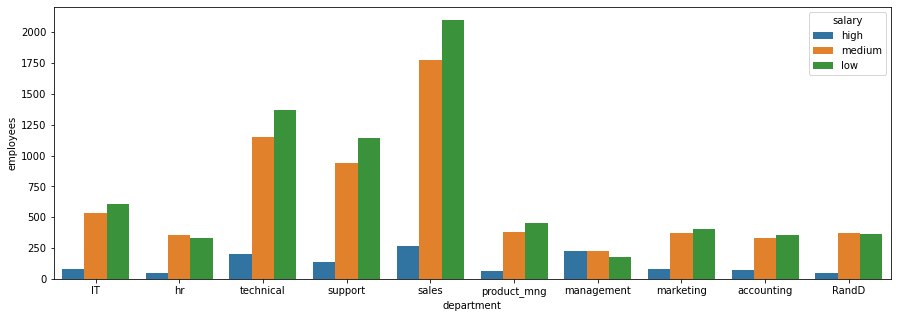

In [100]:
sns.barplot(x='department', y='employees', hue='salary', data=salary_dep, ci=None);

Задание 7

H0 - сотрудники с высоким окладом работают как и все остальные

H1 - сотрудники с высоким окладом проводят больше времени на работе, чем сотрудники с низким окладом

In [101]:
data_low = data[data['salary'] == 'low']['average_montly_hours'] 

data_high = data[data['salary'] == 'high']['average_montly_hours']

In [102]:
a = 0.05

In [103]:
t, p_value = stats.ttest_ind(a=data_low, b=data_high, equal_var=False) # критерий Стьюдента (t-test)

print('T-test: ', t, ', p-value: ', p_value)
print()

if p_value > a:
    print('гипотеза о зависимости между временем работы и величиной оклада не подтверждена')
else:
    print('гипотеза о зависимости между временем работы и величиной оклада подтверждена')

T-test:  0.7624331665385475 , p-value:  0.4459045542257889

гипотеза о зависимости между временем работы и величиной оклада не подтверждена


Задание 8

1. Доля сотрудников с повышением за последние 5 лет
2. Средняя степень удовлетворенности
3. Среднее количество проектов

In [104]:
data_yes = data[data['left'].isin([1])] # только уволившиеся сотрудники
data_yes.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [105]:
data_no = data[data['left'].isin([0])] # только не уволившиеся 
data_no.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [106]:
List = [] # список с пустыми данными
M1yes = round(data_yes[data_yes['promotion_last_5years'] == 1].shape[0] / data_yes['promotion_last_5years'].count(), 3)
M1no = round(data_no[data_no['promotion_last_5years'] == 1].shape[0] / data_no['promotion_last_5years'].count(), 3)

List.append(['доля сотрудников с повышением за последние 5 лет', M1yes, M1no])

In [107]:
M2yes = round(data_yes['satisfaction_level'].mean(), 2)
M2no = round(data_no['satisfaction_level'].mean(), 2)

List.append(['степень удовлетворенности сотрудников', M2yes, M2no])

In [108]:
M3yes = round(data_yes['number_project'].mean(), 2)
M3no = round(data_no['number_project'].mean(), 2)

List.append(['Среднее количество проектов', M3yes, M3no])

In [109]:
result = pd.DataFrame(List, columns=['метрика', 'для уволившихся', 'для не уволившихся']) # делаем из списка датасет

result

,метрика,для уволившихся,для не уволившихся
0,доля сотрудников с повышением за последние 5 лет,0.005,0.026
1,степень удовлетворенности сотрудников,0.440,0.670
2,Среднее количество проектов,3.860,3.790


Задание 9

1. Разделить данные на тестовую и обучающую выборки
2. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
3. Оценить качество модели на тестовой выборки

In [110]:
data_LDA = data.drop(['department', 'salary'], axis=1)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(data_LDA, data_LDA['left'], test_size=0.25) # делим данные на тестовую и тренировочную выборки

In [112]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train) # обучение модели

LinearDiscriminantAnalysis()

In [113]:
lda.predict(X_test) # прогноз

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [114]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T # разница между прогнозом и фактом
result

,left,Unnamed 0
9321,0.0,NaN
12300,1.0,NaN
2645,0.0,0.0
5173,0.0,NaN
4764,0.0,NaN
...,...,...
9587,0.0,NaN
378,1.0,0.0
6863,0.0,NaN
9683,0.0,NaN


In [115]:
accuracy_score(y_test, lda.predict(X_test)) # точность модели

0.7541333333333333

In [116]:
lda.coef_  # коэфф. дискриминантных линий 

array([[-4.52682975e+00,  6.60886657e-01, -2.43746561e-01,
         4.15123436e-03,  2.15919294e-01, -1.06788542e+00,
         0.00000000e+00, -1.06481919e+00]])